In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('coca_cola sales.csv')

In [4]:
df

Quarter        Sales
0     1986-01-01  1837.827000
1     1986-01-02  1841.495155
2     1986-01-03  1851.163311
3     1986-01-04  1854.831466
4     1986-01-05  1735.499622
...          ...          ...
3829  1996-06-26  5109.000000
3830  1996-06-27  5134.000000
3831  1996-06-28  5038.000000
3832  1996-06-29  5325.000000
3833  1996-06-30  5544.000000

[3834 rows x 2 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  3834 non-null   object 
 1   Sales    3834 non-null   float64
dtypes: float64(1), object(1)
memory usage: 60.0+ KB


In [6]:
df['Day'] = pd.to_datetime(df['Quarter'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Quarter  3834 non-null   object        
 1   Sales    3834 non-null   float64       
 2   Day      3834 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 90.0+ KB


In [8]:
df.drop('Quarter', axis=1, inplace=True)

<Axes: xlabel='Day'>

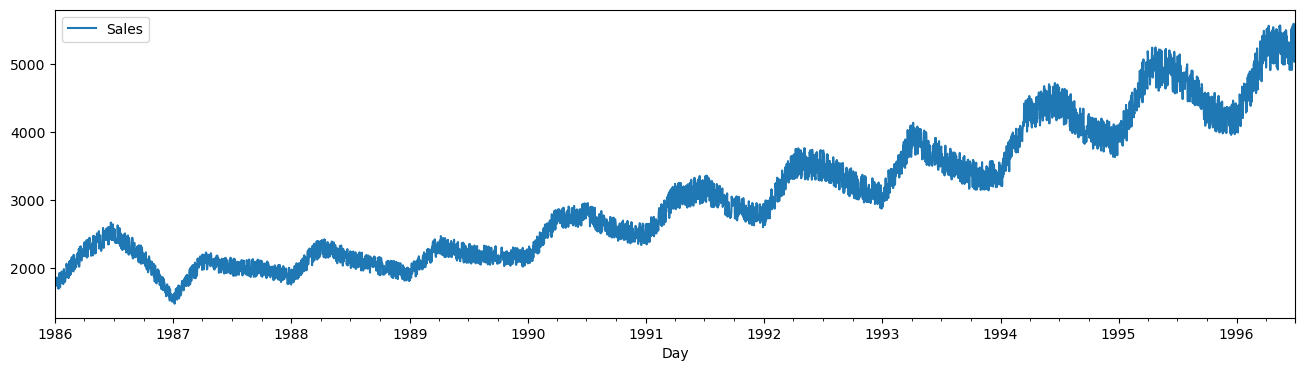

In [9]:
df.set_index('Day').plot(figsize=(16,4))

In [10]:
df.set_index('Day', inplace=True)

In [11]:
import statsmodels.api as sm

In [12]:
df

Sales
Day                    
1986-01-01  1837.827000
1986-01-02  1841.495155
1986-01-03  1851.163311
1986-01-04  1854.831466
1986-01-05  1735.499622
...                 ...
1996-06-26  5109.000000
1996-06-27  5134.000000
1996-06-28  5038.000000
1996-06-29  5325.000000
1996-06-30  5544.000000

[3834 rows x 1 columns]

## Time Series Decomposition

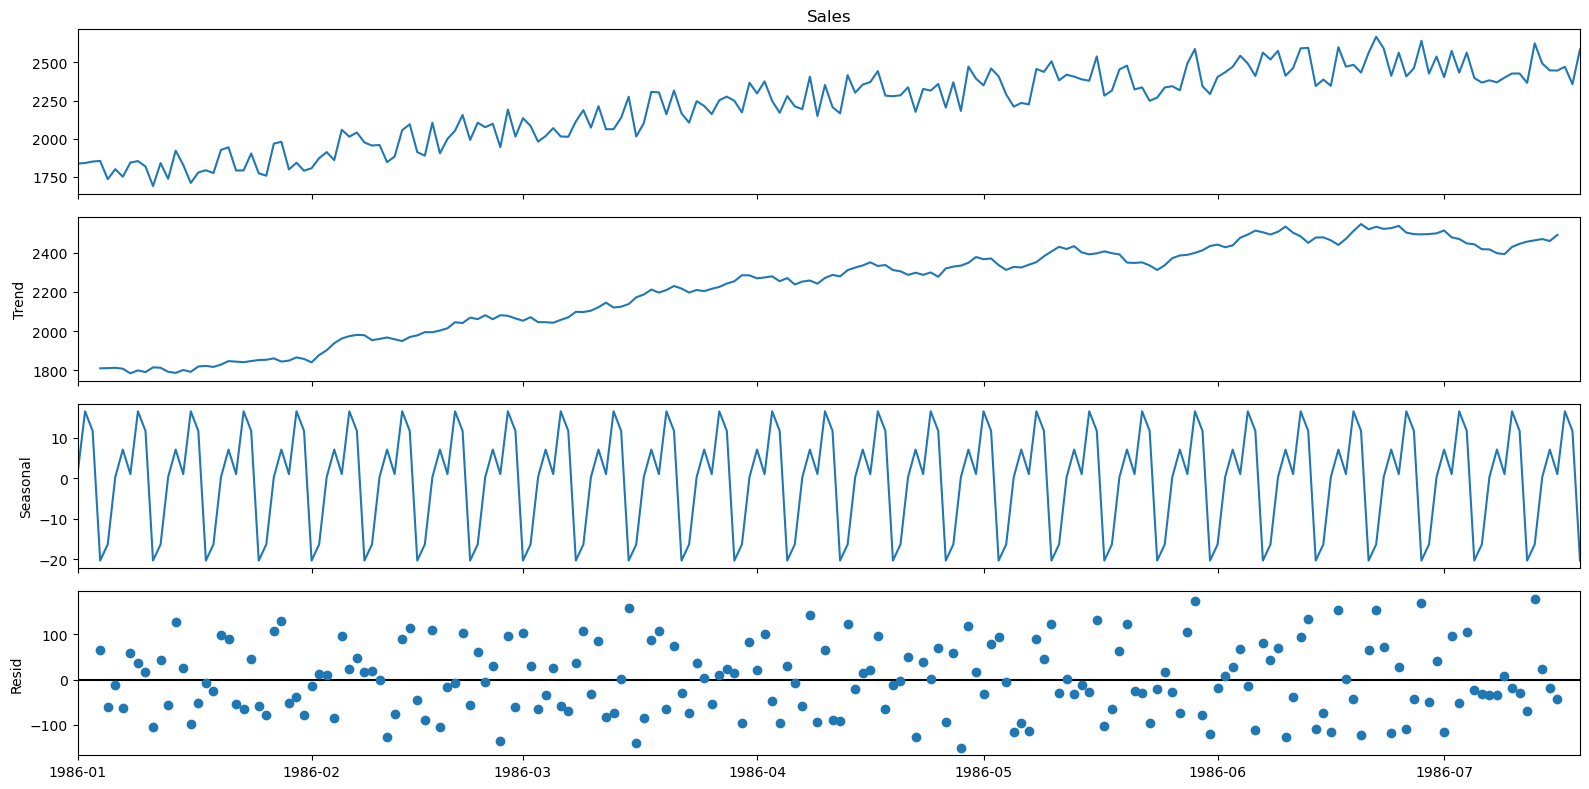

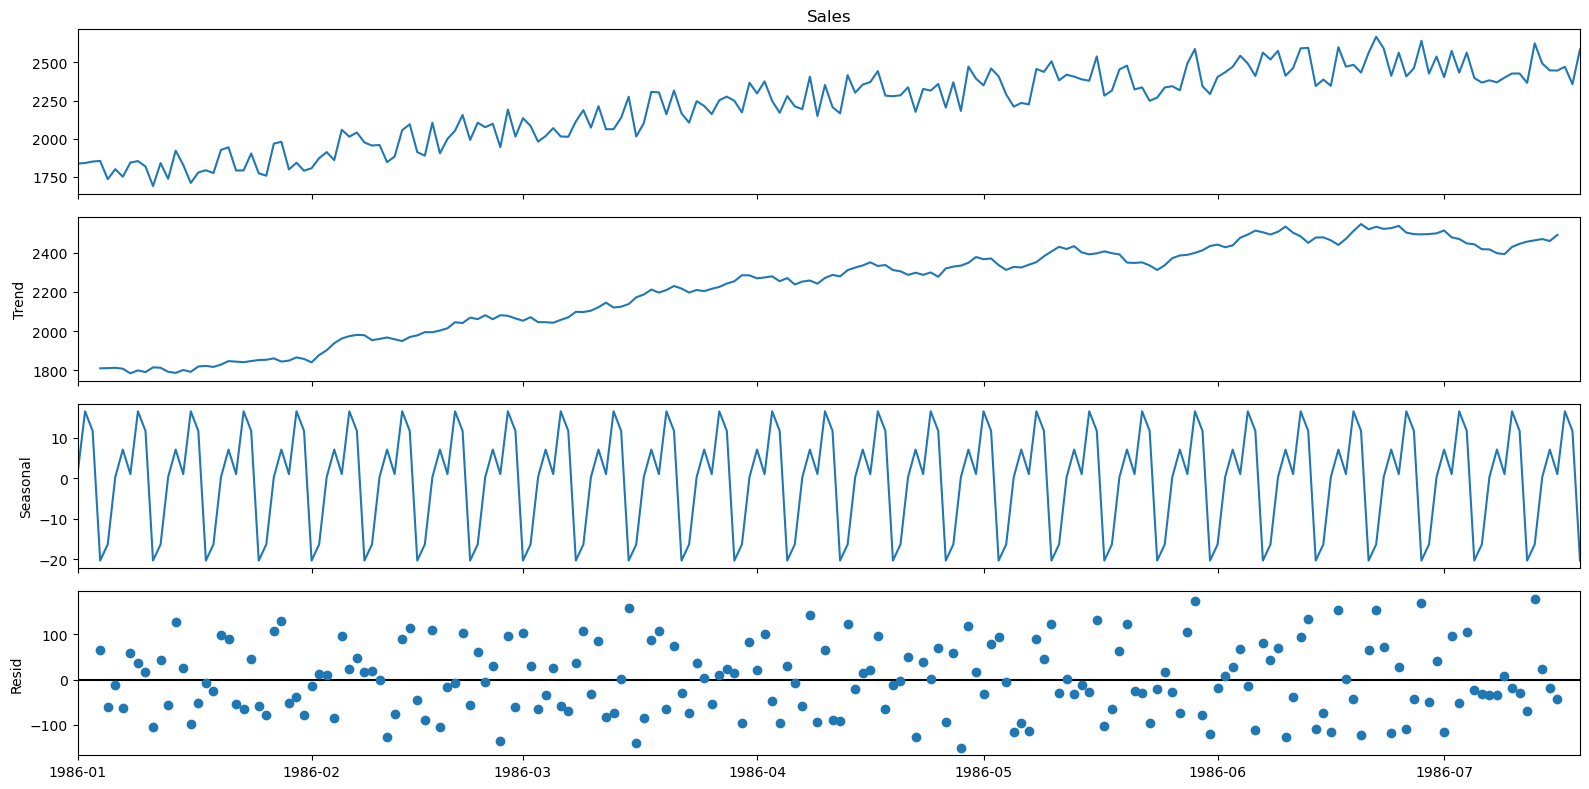

In [13]:
plt.rcParams['figure.figsize'] = (16, 8)
decomposition = sm.tsa.seasonal_decompose(df['Sales'].iloc[:200], model='additive')
decomposition.plot()

## Stationarity Check

In [14]:
plt.rcParams['figure.figsize'] = (16, 4)

In [15]:
df['MovingAverage'] = df['Sales'].rolling(365).mean()
df['MovingVariance'] = df['Sales'].rolling(365).std()

In [16]:
df

Sales  MovingAverage  MovingVariance
Day                                                   
1986-01-01  1837.827000            NaN             NaN
1986-01-02  1841.495155            NaN             NaN
1986-01-03  1851.163311            NaN             NaN
1986-01-04  1854.831466            NaN             NaN
1986-01-05  1735.499622            NaN             NaN
...                 ...            ...             ...
1996-06-26  5109.000000    4718.526584      438.047488
1996-06-27  5134.000000    4719.544799      438.581248
1996-06-28  5038.000000    4720.780686      438.841945
1996-06-29  5325.000000    4722.817808      439.917866
1996-06-30  5544.000000    4725.190411      442.005824

[3834 rows x 3 columns]

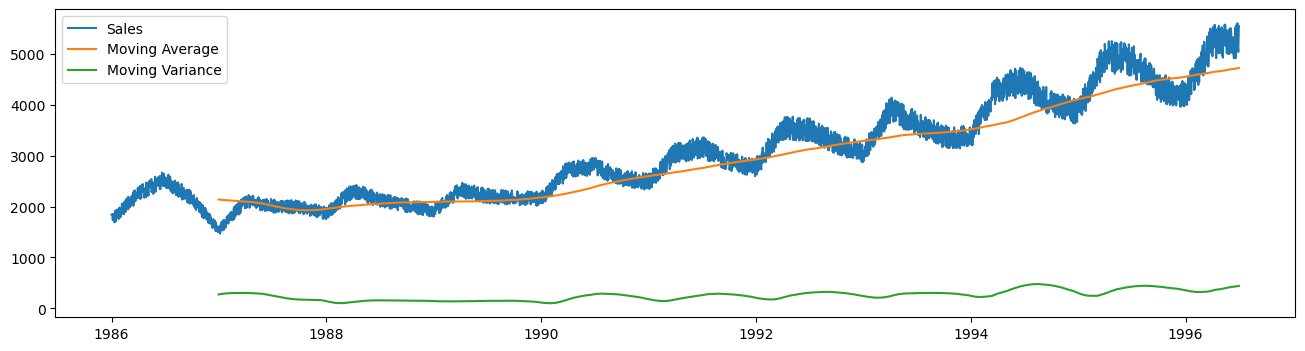

In [17]:
plt.plot(df.Sales, label="Sales")
plt.plot(df.MovingAverage, label='Moving Average')
plt.plot(df.MovingVariance, label='Moving Variance')
plt.legend();

In [18]:
from statsmodels.tsa.stattools import adfuller
def adf_test(df, column):
    results = adfuller(df[column])
    p_value = results[1]
    if p_value < 0.05:
        print('Strong evidnece against null hypothesis, that states our series is stationary')
    else:
        print('Weak evidence against null hypothesis, series is not stationary')
        
    df['{}_MovingAverage'.format(column)] = df[column].rolling(365).mean()
    df['{}_MovingVariance'.format(column)] = df[column].rolling(365).std()
    
    plt.plot(df[column], label="Sales")
    plt.plot(df['{}_MovingAverage'.format(column)], label='Moving Average')
    plt.plot(df['{}_MovingVariance'.format(column)], label='Moving Variance')
    plt.legend();

Weak evidence against null hypothesis, series is not stationary


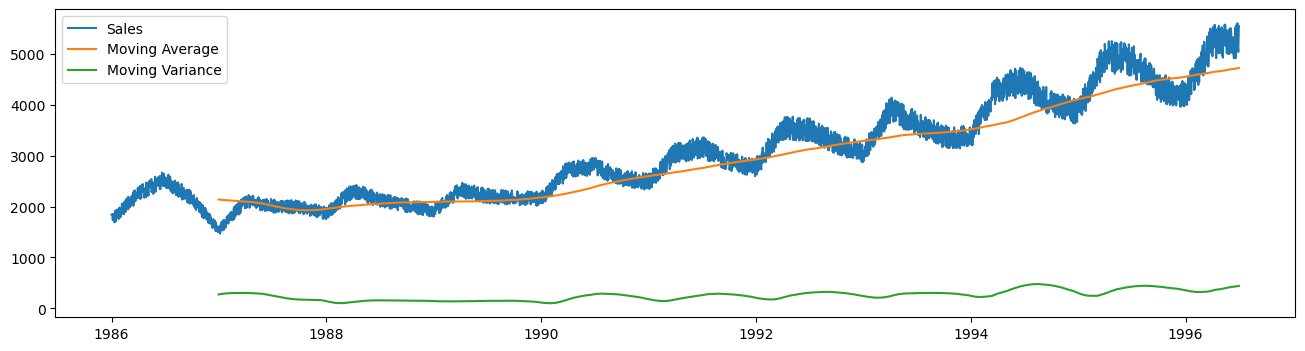

In [19]:
adf_test(df, 'Sales')

### Sales First Difference

In [20]:
df = df[['Sales']].copy()

In [21]:
df.Sales

Day
1986-01-01    1837.827000
1986-01-02    1841.495155
1986-01-03    1851.163311
1986-01-04    1854.831466
1986-01-05    1735.499622
                 ...     
1996-06-26    5109.000000
1996-06-27    5134.000000
1996-06-28    5038.000000
1996-06-29    5325.000000
1996-06-30    5544.000000
Name: Sales, Length: 3834, dtype: float64

In [22]:
df.Sales.shift(1)

Day
1986-01-01            NaN
1986-01-02    1837.827000
1986-01-03    1841.495155
1986-01-04    1851.163311
1986-01-05    1854.831466
                 ...     
1996-06-26    5601.000000
1996-06-27    5109.000000
1996-06-28    5134.000000
1996-06-29    5038.000000
1996-06-30    5325.000000
Name: Sales, Length: 3834, dtype: float64

In [23]:
df['SalesFirstDiff'] =  df.Sales - df.Sales.shift(1)

In [24]:
df['SalesFirstDiff']

Day
1986-01-01           NaN
1986-01-02      3.668156
1986-01-03      9.668156
1986-01-04      3.668156
1986-01-05   -119.331844
                 ...    
1996-06-26   -492.000000
1996-06-27     25.000000
1996-06-28    -96.000000
1996-06-29    287.000000
1996-06-30    219.000000
Name: SalesFirstDiff, Length: 3834, dtype: float64

Strong evidnece against null hypothesis, that states our series is stationary


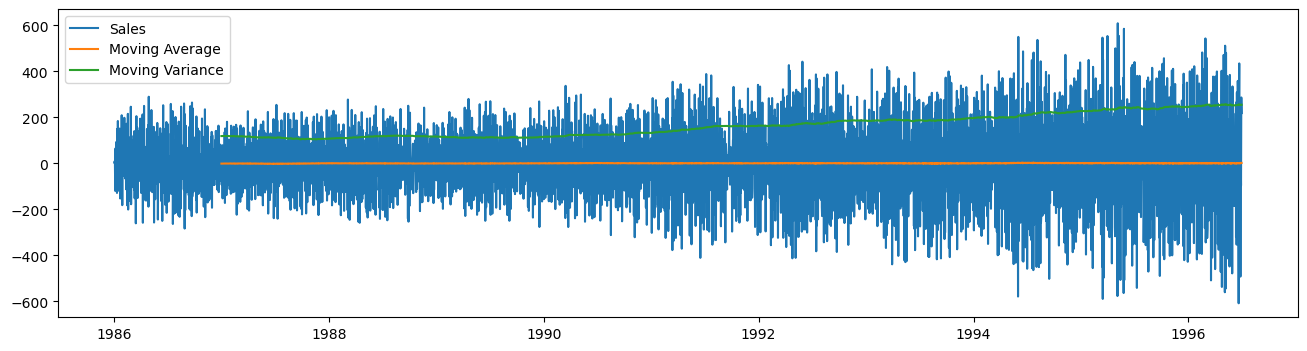

In [25]:
adf_test(df[['SalesFirstDiff']].dropna(), 'SalesFirstDiff')

## ACF and PACF Plots

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

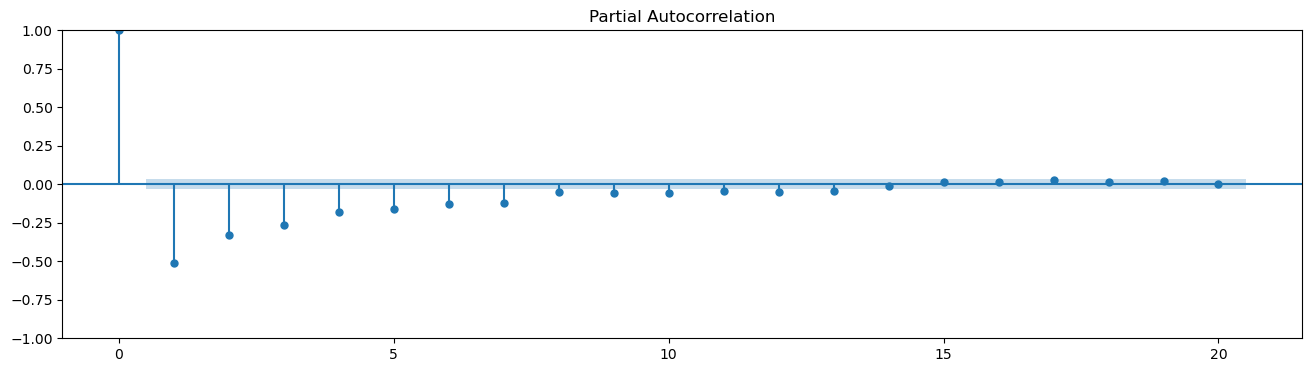

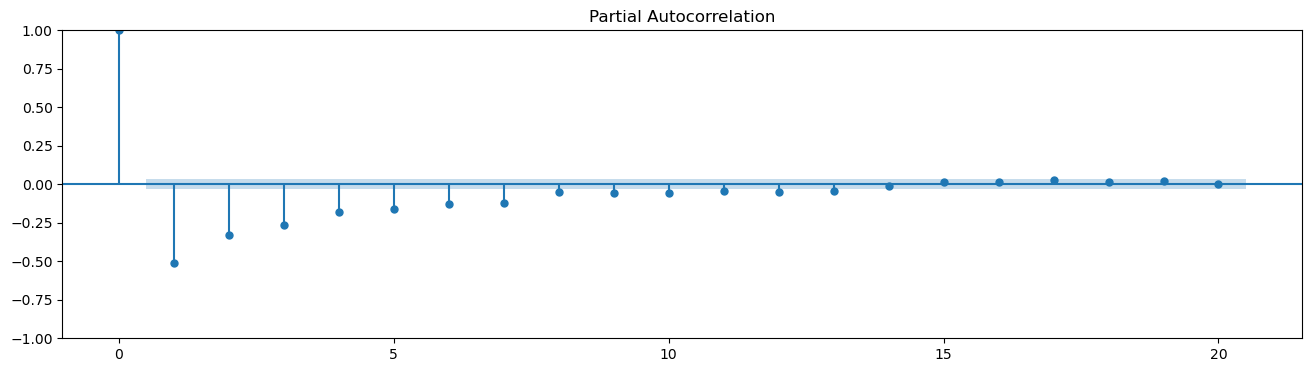

In [27]:
plot_pacf(df['SalesFirstDiff'].dropna(), lags=20)

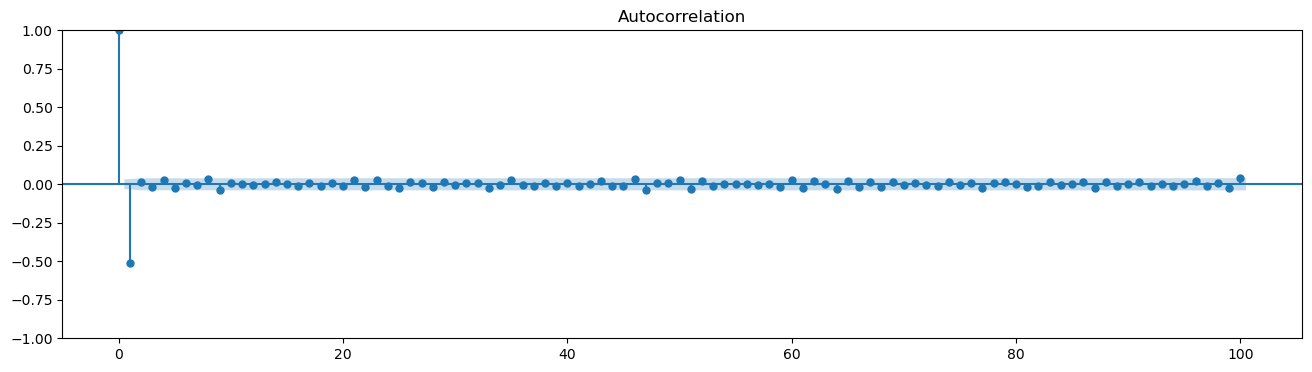

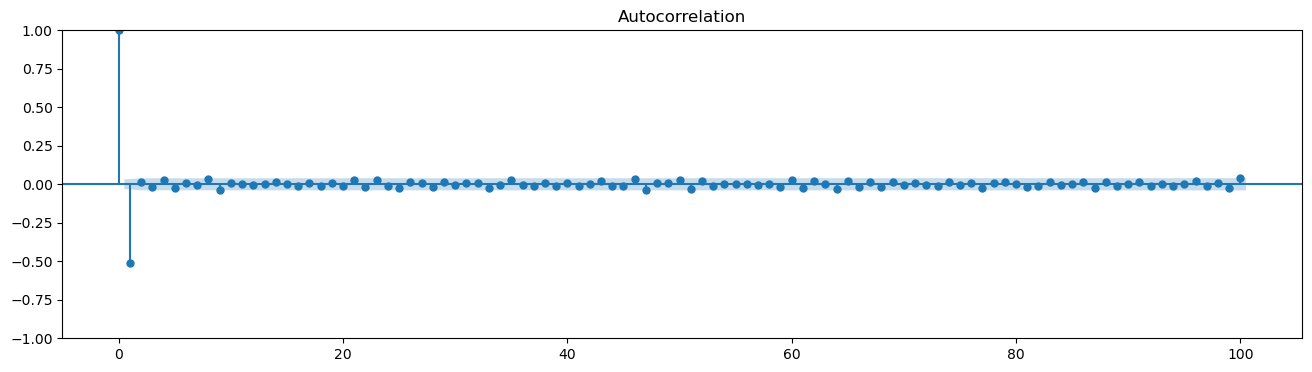

In [28]:
plot_acf(df['SalesFirstDiff'].dropna(), lags=100)

Q = 2 <br>
P = 13 <br>
D = 1 <br>

In [29]:
df

Sales  SalesFirstDiff
Day                                    
1986-01-01  1837.827000             NaN
1986-01-02  1841.495155        3.668156
1986-01-03  1851.163311        9.668156
1986-01-04  1854.831466        3.668156
1986-01-05  1735.499622     -119.331844
...                 ...             ...
1996-06-26  5109.000000     -492.000000
1996-06-27  5134.000000       25.000000
1996-06-28  5038.000000      -96.000000
1996-06-29  5325.000000      287.000000
1996-06-30  5544.000000      219.000000

[3834 rows x 2 columns]

In [30]:
train, test = df.iloc[:int(0.8*len(df))], df.iloc[int(0.8*len(df)):]

In [31]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Sales'], order=(2,1,13))

model_fit = model.fit()

/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


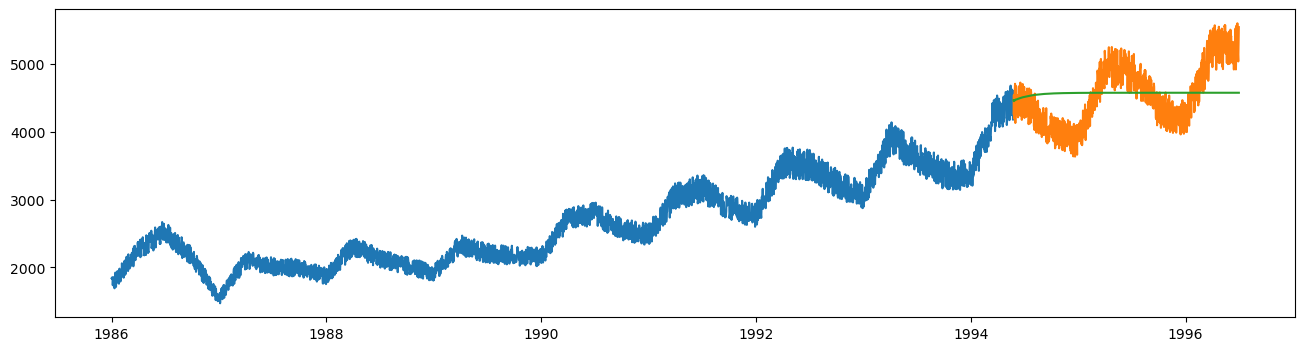

In [32]:
plt.plot(train['Sales'], label='train')
plt.plot(test['Sales'], label='test')
plt.plot(model_fit.forecast(len(test)), label='ARIMA')

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model = SARIMAX(train['Sales'], order=(2,1,13), seasonal_order=(2,1,13,365))
model_fit = model.fit()

/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/abhilashchauhan/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


## Resampling data to monthly sales

In [39]:
df_monthly = df['Sales'].resample('M').interpolate('linear').reset_index()

In [40]:
df_monthly

Day        Sales
0   1986-01-31  1790.871666
1   1986-02-28  2014.580021
2   1986-03-31  2367.292843
3   1986-04-30  2394.010183
4   1986-05-31  2293.407588
..         ...          ...
121 1996-02-29  4819.604396
122 1996-03-31  5413.362637
123 1996-04-30  5494.000000
124 1996-05-31  5254.000000
125 1996-06-30  5544.000000

[126 rows x 2 columns]

In [41]:
from statsmodels.tsa.stattools import adfuller
def adf_test(df, column):
    results = adfuller(df[column])
    p_value = results[1]
    if p_value < 0.05:
        print('Strong evidnece against null hypothesis, that states our series is stationary')
    else:
        print('Weak evidence against null hypothesis, series is not stationary')
        
    df['{}_MovingAverage'.format(column)] = df[column].rolling(365).mean()
    df['{}_MovingVariance'.format(column)] = df[column].rolling(365).std()
    
    plt.plot(df[column], label="Sales")
    plt.plot(df['{}_MovingAverage'.format(column)], label='Moving Average')
    plt.plot(df['{}_MovingVariance'.format(column)], label='Moving Variance')
    plt.legend();

Weak evidence against null hypothesis, series is not stationary


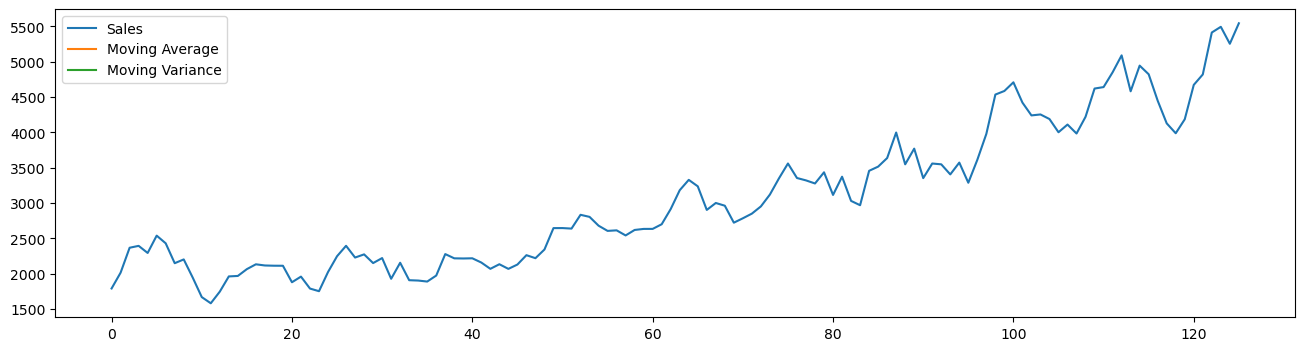

In [42]:
adf_test(df_monthly, 'Sales')

### Sales First Difference

In [43]:
df_monthly = df_monthly[['Sales']].copy()

In [44]:
df_monthly.Sales

0      1790.871666
1      2014.580021
2      2367.292843
3      2394.010183
4      2293.407588
          ...     
121    4819.604396
122    5413.362637
123    5494.000000
124    5254.000000
125    5544.000000
Name: Sales, Length: 126, dtype: float64

In [45]:
df_monthly.Sales.shift(1)

0              NaN
1      1790.871666
2      2014.580021
3      2367.292843
4      2394.010183
          ...     
121    4672.120879
122    4819.604396
123    5413.362637
124    5494.000000
125    5254.000000
Name: Sales, Length: 126, dtype: float64

In [46]:
df_monthly['SalesFirstDiff'] =  df_monthly.Sales - df_monthly.Sales.shift(1)

In [47]:
df_monthly['SalesFirstDiff']

0             NaN
1      223.708355
2      352.712822
3       26.717340
4     -100.602595
          ...    
121    147.483516
122    593.758242
123     80.637363
124   -240.000000
125    290.000000
Name: SalesFirstDiff, Length: 126, dtype: float64

Strong evidnece against null hypothesis, that states our series is stationary


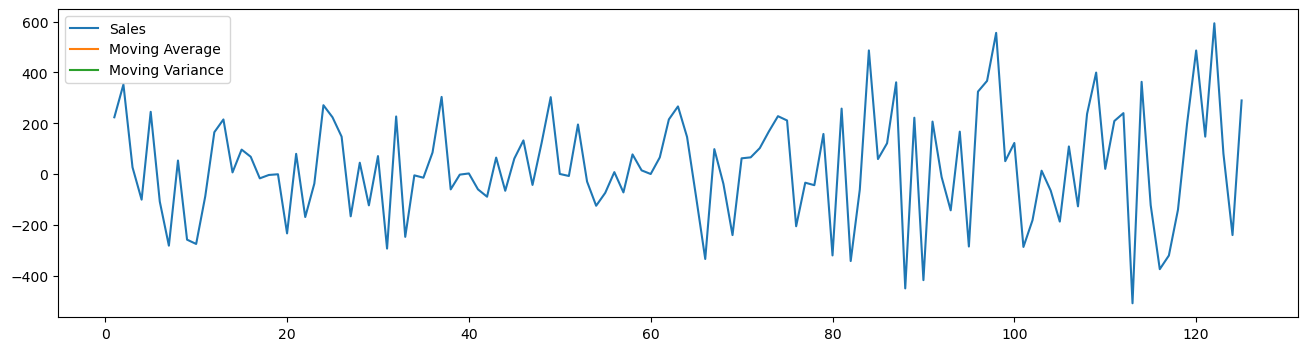

In [48]:
adf_test(df_monthly[['SalesFirstDiff']].dropna(), 'SalesFirstDiff')

## ACF and PACF Plots

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

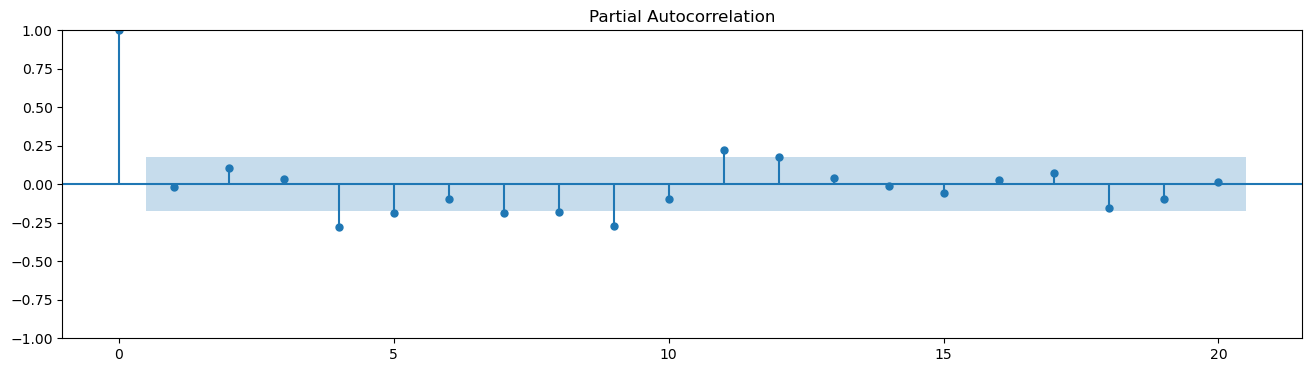

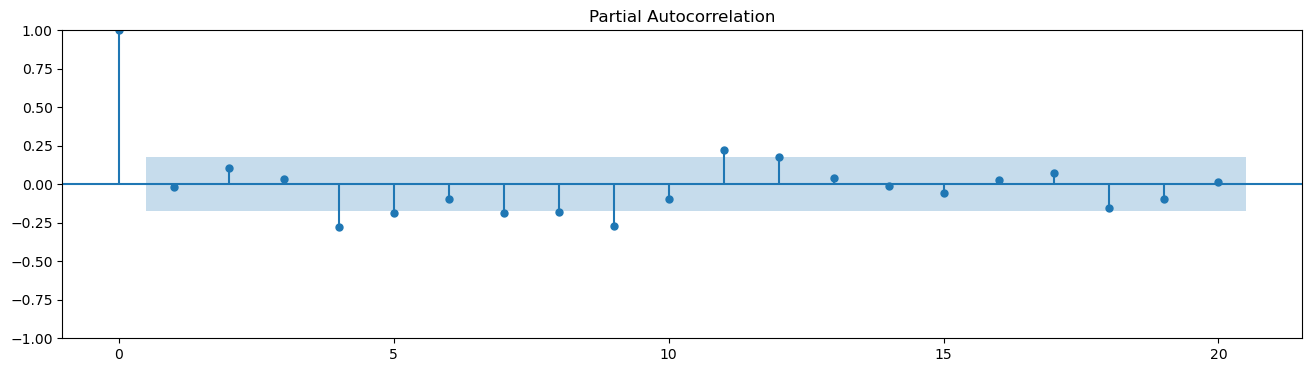

In [50]:
plot_pacf(df_monthly['SalesFirstDiff'].dropna(), lags=20)

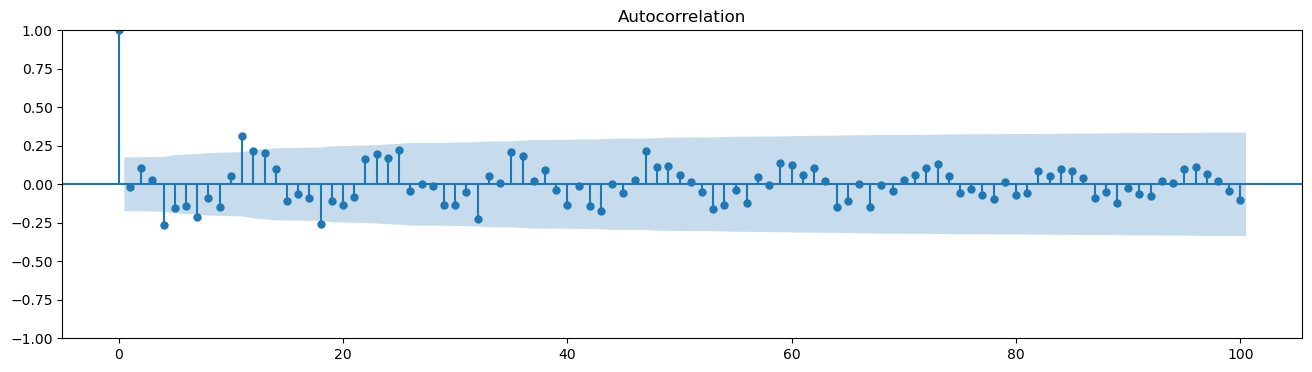

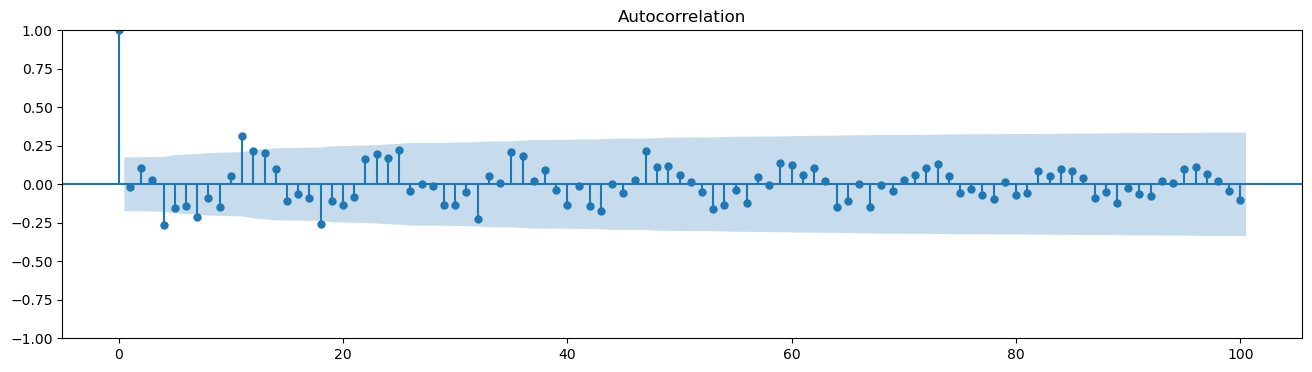

In [51]:
plot_acf(df_monthly['SalesFirstDiff'].dropna(), lags=100)

Q = 1 <br>
P = 1 <br>
D = 1 <br>

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
train, test = train_test_split(df_monthly, test_size=0.2, shuffle=False)

In [52]:
train, test = df_monthly.iloc[:int(0.8*len(df_monthly))], df_monthly.iloc[int(0.8*len(df_monthly)):]

In [53]:
model = SARIMAX(train['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73133D+00    |proj g|=  1.08469D-01

At iterate    5    f=  5.72142D+00    |proj g|=  1.04679D-02

At iterate   10    f=  5.72116D+00    |proj g|=  1.68963D-03

At iterate   15    f=  5.72093D+00    |proj g|=  3.51059D-03

At iterate   20    f=  5.71895D+00    |proj g|=  3.94584D-02

At iterate   25    f=  5.71251D+00    |proj g|=  1.05348D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     32      1     0     0   

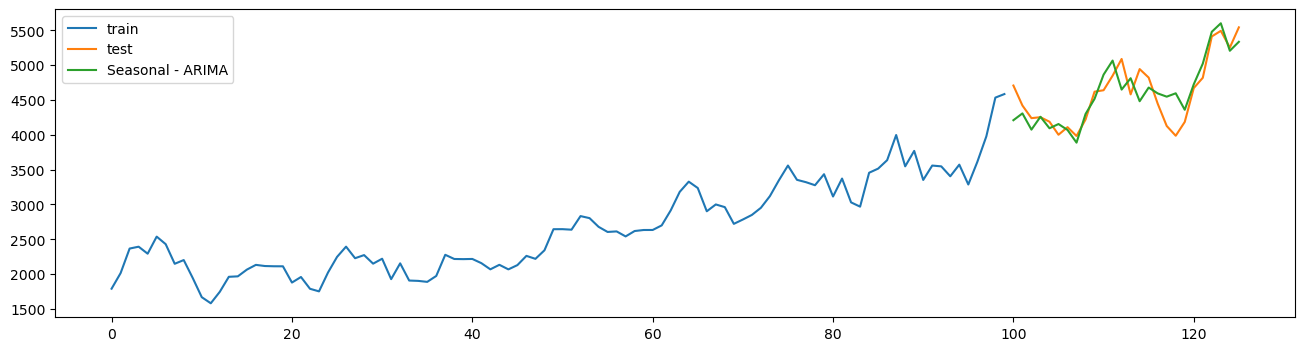

In [55]:
plt.plot(train['Sales'], label='train')
plt.plot(test['Sales'], label='test')
plt.plot(model_fit.forecast(len(test)), label='Seasonal - ARIMA')
plt.legend()